# Regresion Avanzada - Trabajo Practico

In [1]:
# Autor: Andres Montes de Oca

# Instalacion de Paquetes
# !pip install pingouin
# !pip install scipy

# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st

#### Logbook

In [2]:
# 31/05/23 -> Creacion de la Notebook
# 31/05/23 -> 1.1, 1.2
# 04/06/23 -> 1.3

## Key Assumptions

In [39]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1) Linear Relationship

In [45]:
# sns.scatterplot(data=data, x='petal_length', y='petal_width')

### 2) All Variables are Normal

In [59]:
# st.probplot(data['sepal_width'], plot=plt)
# plt.show()

# pg.normality(data['sepal_width'])

### 3) No Multicollinearity

In [70]:
# sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='RdYlGn')

### 4) No Autocorrelation of Errors

In [ ]:
# Normality of Residuals, Durbin-Watson Test
# st.probplot(resid, dist='norm', plot=plt)

### 5) No Heterosedasticity

In [ ]:
# Statsmodels: resid =  ytest - ypred
# sns.residplot(resid, ypred)

### 1) Linear Relationship

### 1.1 Correlacion

"Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas. Y Homocedasticidad?

La correlación de Spearman (Rho) se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall (Tau) es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras."

Fuente: https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

In [3]:
# Cargamos los datos
data = pd.read_excel('Data/grasacerdos.xlsx', index_col='Obs')

# Reemplazo , por .
data = data.replace(to_replace=',', value='.', regex=True)

# Transformo en float
data = data.astype('float')

data.head()

,PV,EGD
Obs,,
1,56.81,16.19
2,70.40,22.00
3,71.73,19.52
4,75.10,31.00
5,79.65,23.58


#### 1.1.a Grafico de Dispersion

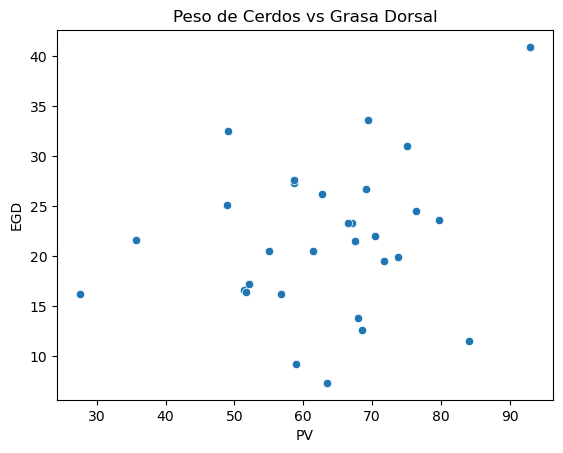

In [4]:
# Graficamos usando Seaborn
sns.scatterplot(data=data, x='PV', y='EGD')
plt.title('Peso de Cerdos vs Grasa Dorsal')
plt.show()

- No se observa ninguna correlacion

#### 1.1.b Calculo de Normalidad de cada Variable

In [5]:
# Shapiro Test using SciPy
print('Normalidad de PV:', st.shapiro(data['PV']))
print('Normalidad de EGD:', st.shapiro(data['EGD']), '\n')

# Shapiro using Pingouin
display(pg.normality(data))

# Homoscedasticity Test
display(pg.homoscedasticity(data))

Normalidad de PV: ShapiroResult(statistic=0.9753308892250061, pvalue=0.6924813985824585)
Normalidad de EGD: ShapiroResult(statistic=0.9851352572441101, pvalue=0.9394674301147461) 



,W,pval,normal
PV,0.975331,0.692481,True
EGD,0.985135,0.939467,True


,W,pval,equal_var
levene,6.359342,0.014445,False


- Tanto PV como EGD, parecen venir de una distribucion Normal.

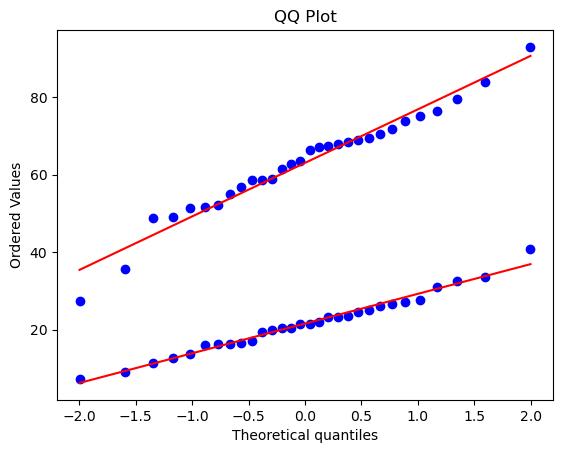

In [6]:
# QQ Plot
st.probplot(data['PV'], plot=plt)
st.probplot(data['EGD'], plot=plt)
plt.title('QQ Plot')
plt.show()

- Se verifica la Normalidad con los QQ, aunque mucho mas en EGD (Grasa Dorsal)

#### 1.1.c Calculo Coeficiente Correlacion

In [7]:
# Usando Pandas
print('Pearson:', data['PV'].corr(data['EGD'], method='pearson'))
print('Spearman:', data['PV'].corr(data['EGD'], method='spearman'))
print('Kendall:', data['PV'].corr(data['EGD'], method='kendall'), '\n')

# Usando Scipy Stats
print(st.pearsonr(data['PV'], data['EGD']))
print(st.spearmanr(data['PV'], data['EGD']))
print(st.kendalltau(data['PV'], data['EGD']))

# Usando Pingouin (devuelve in DataFrame, asi que uso display en lugar de print)
display(pg.corr(data['PV'], data['EGD'], method='pearson'))
display(pg.corr(data['PV'], data['EGD'], method='spearman'))
display(pg.corr(data['PV'], data['EGD'], method='kendall'))

Pearson: 0.25434338918596944
Spearman: 0.16618464961067853
Kendall: 0.11264367816091954 

PearsonRResult(statistic=0.2543433891859694, pvalue=0.17499421195286707)
SignificanceResult(statistic=0.16618464961067853, pvalue=0.38011770642295883)
SignificanceResult(statistic=0.11264367816091954, pvalue=0.39503197640794263)


,n,r,CI95%,p-val,BF10,power
pearson,30,0.254343,"[-0.12, 0.56]",0.174994,0.546,0.27791


,n,r,CI95%,p-val,power
spearman,30,0.166185,"[-0.21, 0.5]",0.380118,0.142724


,n,r,CI95%,p-val,power
kendall,30,0.112644,"[-0.26, 0.45]",0.395032,0.091095


- Todos los coeficientes de correlacion son muy pequenos
- Confirmamos lo visto en el Scatterplot, no existe correlacion entre ambas variables

#### 1.1.d Henze-Zirkler Multivariate Normality Test

In [8]:
# Pingouin, la unica libreria que tiene el test
print(pg.multivariate_normality(data))

HZResults(hz=0.25394365632841115, pval=0.9049686197809698, normal=True)


#### 1.1.e Anscombe

In [9]:
# Cargamos los datos
# data = pd.read_excel('data/anscombe.xlsx') # Parece estar incompleto el Dataset?
data = pd.read_excel('data/anscombe2.xlsx') # Cargamos la v2 completa
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


Medias x1, y1: 9.0 7.5
Desvios: 3.317 2.032


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816421,"[0.42, 0.95]",0.00217,22.903,0.917298


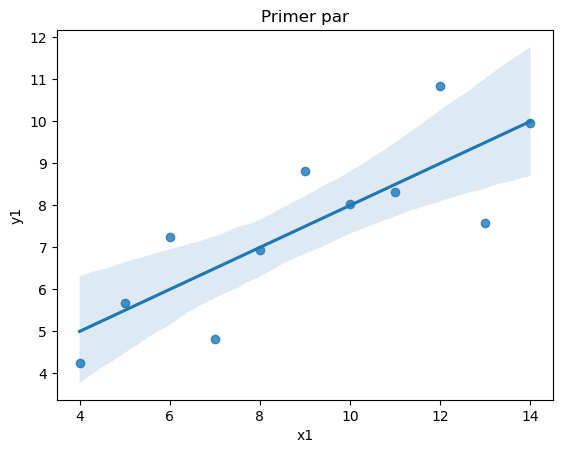

Medias x2, y2: 9.0 7.5
Desvios: 3.317 2.032


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816237,"[0.42, 0.95]",0.002179,22.827,0.917056


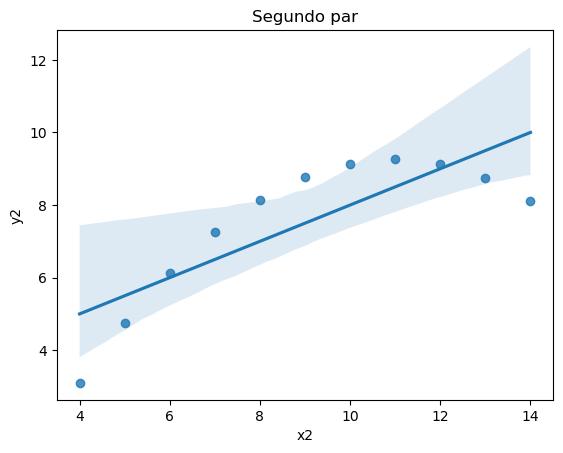

Medias x3, y3: 9.0 7.5
Desvios: 3.317 2.03


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816287,"[0.42, 0.95]",0.002176,22.847,0.917122


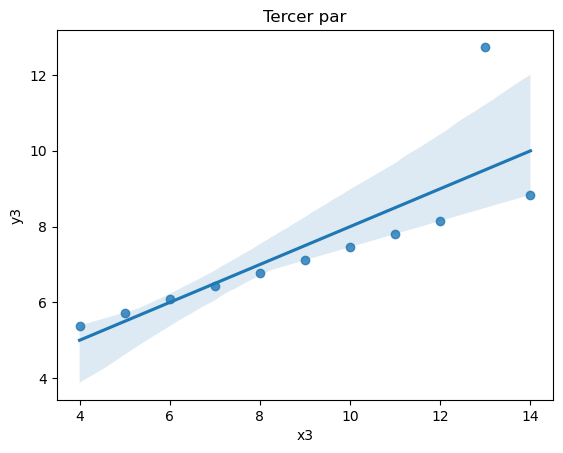

Medias x4, y4: 9.0 7.5
Desvios: 3.317 2.031


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816521,"[0.42, 0.95]",0.002165,22.944,0.917431


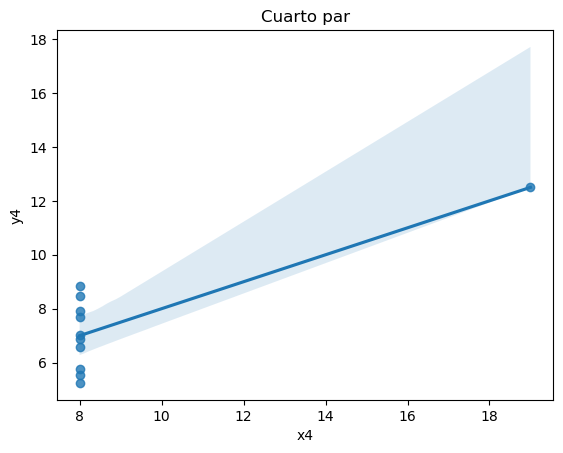

In [10]:
# Ploteamos
sns.regplot(data=data, x='x1', y='y1')
print('Medias x1, y1:', data['x1'].mean(), data['y1'].mean().round(2))
print('Desvios:', np.round(data['x1'].std(), 3), np.round(data['y1'].std(), 3))
display(pg.corr(data['x1'], data['y1'], method='pearson'))
plt.title('Primer par')
plt.show()

sns.regplot(data=data, x='x2', y='y2')
print('Medias x2, y2:', data['x2'].mean(), data['y2'].mean().round(2))
print('Desvios:', np.round(data['x2'].std(), 3), np.round(data['y2'].std(), 3))
display(pg.corr(data['x2'], data['y2'], method='pearson'))
plt.title('Segundo par')
plt.show()

sns.regplot(data=data, x='x3', y='y3')
print('Medias x3, y3:', data['x3'].mean(), data['y3'].mean().round(2))
print('Desvios:', np.round(data['x3'].std(), 3), np.round(data['y3'].std(), 3))
display(pg.corr(data['x3'], data['y3'], method='pearson'))
plt.title('Tercer par')
plt.show()

sns.regplot(data=data, x='x4', y='y4')
print('Medias x4, y4:', data['x4'].mean(), data['y4'].mean().round(2))
print('Desvios:', np.round(data['x4'].std(), 3), np.round(data['y4'].std(), 3))
display(pg.corr(data['x4'], data['y4'], method='pearson'))
plt.title('Cuarto par')
plt.show()

- El Coeficiente de Determinacion es mas parecido al Pipita Higuain que a Messi. Messi se parece mas al Coeficiente de Determinacion Ajustado

### 1.2 Modelo Lineal Simple

In [11]:
# Cargamos los datos
data = pd.read_excel('Data/peso_edad_colest.xlsx')
data.head()

,peso,edad,colest
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


#### 1.2.a DIagrama de Dispersion

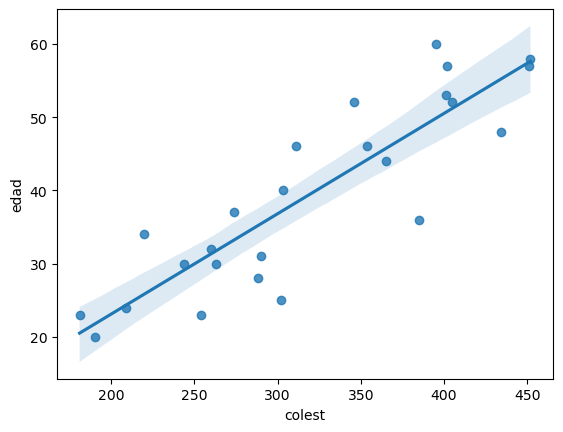

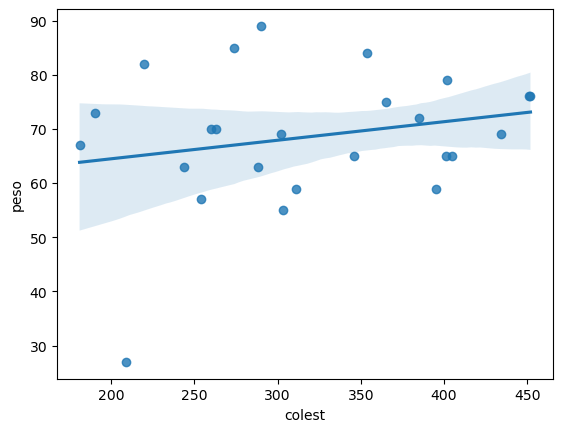

In [12]:
# Ploteamos
sns.regplot(data=data, x='colest', y='edad')
plt.show()

sns.regplot(data=data, x='colest', y='peso')
plt.show()

- La relacion para estar solamente entre Colestero y Edad

#### 1.2.b Coeficientes  de Correlacion

In [13]:
# Colesterol vs Edad
display(pg.corr(data['colest'], data['edad']))

# Colesterol vs Peso
display(pg.corr(data['colest'], data['peso']))

,n,r,CI95%,p-val,BF10,power
pearson,25,0.881147,"[0.75, 0.95]",6.094237e-09,1.945e+06,0.999998


,n,r,CI95%,p-val,BF10,power
pearson,25,0.225372,"[-0.19, 0.57]",0.278728,0.433,0.193901


#### 1.2.c Modelo Lineal (Colesterol ~ Edad)

In [14]:
# Modelo Regresion Lineal con Statsmodel (approach mas estadistico)
import statsmodels.api as sm

X = data[['edad']] # Variable/s independiente, doble corchete para mantener 2d
y = data['colest'] # Target

X = sm.add_constant(X) # Se agrega la columna de 1, necesaria para el intercepto
model = sm.OLS(y, X) # Ordinary Least Squares
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colest   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     79.87
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           6.09e-09
Time:                        20:46:59   Log-Likelihood:                -126.46
No. Observations:                  25   AIC:                             256.9
Df Residuals:                      23   BIC:                             259.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.5020     26.255      3.638      0.0

#### 1.2.c Test de Wald (Pendiente)

In [15]:
# # This test is often used to determine if one or more predictor variables in a regression model are equal to zero
# import statsmodels.formula.api as smf

# results = smf.ols('colest ~ peso + edad', data).fit()
# # display(results.summary())

# # H0 indica que no aporta
# print('Peso\n', results.wald_test('( peso = 0)')) # Peso
# print('Edad\n', results.wald_test('( edad = 0)')) # Edad

# # Pendiente de confirmar

#### 1.2.d Prediccion para 25, 48 y 80 anos

In [16]:
# Genero el vector de test
x_test = np.array([25, 48, 80])
x_test = sm.add_constant(x_test) # Agrego la constante de unos
y_pred = results.predict(x_test)
print(y_pred)

[237.27304609 367.70240481 549.16933868]


#### 1.2.e Normalidad de Residuos (pendiente)

In [17]:
# # Homoscedasticity Test
# display(pg.homoscedasticity(data))

### 1.3 Transformacion de Variables

In [20]:
# Cargo y renombro sacandole el acento
data = pd.read_excel('Data/energia.xlsx', index_col='Hora')
data.rename(columns={'Energía':'Energia'}, inplace=True)
data.head()

,Energia
Hora,
1,598
2,527
3,530
4,528
5,452


#### 1.3.a Dispersion

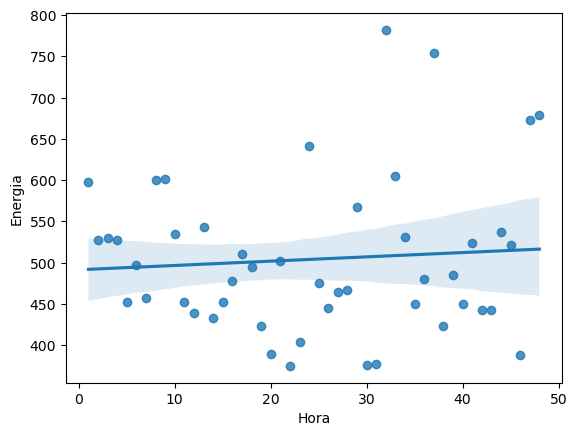

In [29]:
# Graficamos
sns.regplot(data, x=data.index, y='Energia')
plt.show()